# Probability

First, we sample from the normal distribution $\mathcal{N}(0., 1.)$

In [1]:
from numpy.random import normal

N = 1000 # Number of samples to take
samples = normal(size=N)

Then, we plot the histogram of samples:

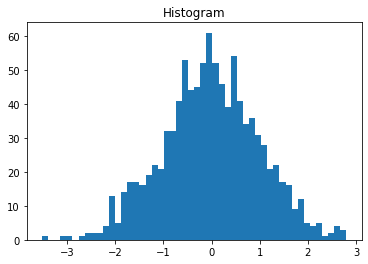

In [2]:
%matplotlib inline

from matplotlib import pyplot as plt

BINS = 50
plt.hist(samples, bins=BINS)
plt.title("Histogram")
plt.show()

Now let us compare the reference Guassian:

In [15]:
print("Hello! I'm incomplete :(")

Hello! I'm incomplete :(


Now we draw the histogram of $y_i = e_i^x$ where $x_i \in \mathcal{N}(0., 1.)$

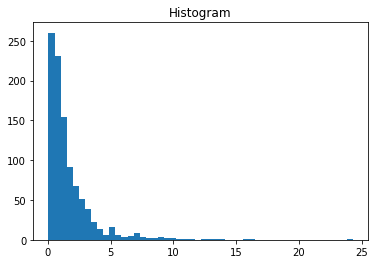

In [18]:
from numpy import exp

# Compute the transformation
samples = normal(size=N)
transformed_samples = exp(samples)

# Draw the histogram
plt.hist(transformed_samples, bins=BINS)
plt.title("Histogram")
plt.show()

Now, we sample from $\mathcal{U}(0., 1.)$

In [3]:
from numpy.random import uniform

N = 1000
samples = uniform(size=N)